### OVERVIEW DATA

| Column Name    | Description                                                                                                                 |
| -------------- | --------------------------------------------------------------------------------------------------------------------------- |
| `show_id`      | Unique identifier for each show or movie in the dataset. Example: `s1`, `s2`.                                               |
| `type`         | Indicates whether the entry is a **Movie** or a **TV Show**.                                                                |
| `title`        | Title of the movie or TV show.                                                                                              |
| `director`     | Name(s) of the director(s). Empty if not available.                                                                         |
| `cast`         | List of main cast members separated by commas. Empty if not available.                                                      |
| `country`      | Country where the content was produced or released.                                                                         |
| `date_added`   | The date the content was added to the platform (e.g., Netflix). Format: `"Month Day, Year"`.                                |
| `release_year` | The year the movie or show was originally released.                                                                         |
| `rating`       | Content rating (e.g., `PG-13`, `TV-MA`). Shows which audience group it is appropriate for.                                  |
| `duration`     | For movies: duration in minutes (e.g., `90 min`). For TV shows: number of seasons (e.g., `2 Seasons`).                      |
| `listed_in`    | Categories or genres the content belongs to (e.g., `TV Dramas`, `Crime TV Shows`). Multiple genres are separated by commas. |
| `description`  | A short summary or synopsis of the movie or show.                                                                           |

### IMPORT PYTHON LIBRARY

In [724]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import squarify

In [725]:
netflix_palette = [
    "#c62222",  # Strong Red
    "#ebd4d3",  # Light Rose
    "#940404",  # Deep Crimson
    "#a66968",  # Dusty Rose
    "#8d9d9a",  # Muted Teal
    "#3a4749"   # Charcoal Teal
]

netflix_palette_extended = [
    "#940404",  # Deep Crimson
    "#e50914",  # Netflix Red
    "#b81d24",  # Darker Red
    "red",  # Strong Red
    "#a66968",  # Dusty Rose
    "#ebd4d3",  # Light Rose
    "#8d9d9a",  # Muted Teal
    "#6d6d6e",  # Mid gray
    "#8c8c8c",  # Light gray
    "#3a3a3a",  # Charcoal
    "#221f1f"  # Netflix Black
]

df=pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### CHECK & CLEAN DATA

In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [727]:
df = df.assign(
    director = df['director'].fillna('Unknown'),
    cast = df['cast'].fillna('Unknown'),
    country = df['country'].fillna('Unknown'),
    rating = df['rating'].fillna('Unknown'),
    duration = df['duration'].fillna('Unknown'))

In [728]:
df['type'] = df['type'].astype('category')

#### Remove Duplicate

In [729]:
df['format title'] = df['title'].str.lower().str.strip()
df_subset = df.columns.difference(['show_id', 'title'])
duplicates = df[df.duplicated(subset=df_subset,keep=False)]
duplicates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,format title
3371,s3372,Movie,Consequences,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,"October 25, 2019",2014,TV-MA,106 min,"Dramas, International Movies, Thrillers",Secrets bubble to the surface after a sensual ...,consequences
6529,s6530,Movie,Consequences,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,"October 25, 2019",2014,TV-MA,106 min,"Dramas, International Movies, Thrillers",Secrets bubble to the surface after a sensual ...,consequences


In [730]:
df[df.duplicated(subset='format title',keep=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,format title
159,s160,Movie,Love in a Puff,Pang Ho-cheung,"Miriam Chin Wah Yeung, Shawn Yue, Singh Hartih...",Hong Kong,"September 1, 2021",2010,TV-MA,103 min,"Comedies, Dramas, International Movies",When the Hong Kong government enacts a ban on ...,love in a puff
303,s304,Movie,Esperando la carroza,Alejandro Doria,"Luis Brandoni, China Zorrilla, Antonio Gasalla...",Argentina,"August 5, 2021",1985,TV-MA,95 min,"Comedies, Cult Movies, International Movies",Cora has three sons and a daughter and she´s a...,esperando la carroza
1270,s1271,TV Show,Sin senos sí hay paraíso,Unknown,"Catherine Siachoque, Fabián Ríos, Carolina Gai...","United States, Colombia","February 25, 2021",2018,TV-MA,3 Seasons,"International TV Shows, Spanish-Language TV Sh...",Born into a small town controlled by the mafia...,sin senos sí hay paraíso
3371,s3372,Movie,Consequences,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,"October 25, 2019",2014,TV-MA,106 min,"Dramas, International Movies, Thrillers",Secrets bubble to the surface after a sensual ...,consequences
5033,s5034,Movie,FullMetal Alchemist,Fumihiko Sori,"Ryosuke Yamada, Tsubasa Honda, Dean Fujioka, M...",Japan,"February 19, 2018",2017,TV-PG,134 min,"Action & Adventure, Dramas, International Movies",While alchemist Edward Elric searches for a wa...,fullmetal alchemist
5095,s5096,TV Show,Fullmetal Alchemist,Unknown,"Romi Park, Rie Kugimiya, Megumi Toyoguchi, Miy...",Japan,"January 1, 2018",2003,TV-14,1 Season,"Anime Series, International TV Shows",Brothers Edward and Alphonse use alchemy to re...,fullmetal alchemist
5318,s5319,Movie,Death Note,Adam Wingard,"Willem Dafoe, Nat Wolff, Lakeith Stanfield, Ma...",United States,"August 25, 2017",2017,TV-MA,100 min,"Horror Movies, Thrillers",Light Turner finds a supernatural notebook and...,death note
5751,s5752,TV Show,DEATH NOTE,Unknown,"Kappei Yamaguchi, Alessandro Juliani, Mamoru M...",Japan,"October 15, 2016",2006,TV-14,1 Season,"Anime Series, Crime TV Shows, International TV...",When a Japanese high schooler comes into posse...,death note
6529,s6530,Movie,Consequences,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,"October 25, 2019",2014,TV-MA,106 min,"Dramas, International Movies, Thrillers",Secrets bubble to the surface after a sensual ...,consequences
6705,s6706,Movie,Esperando La Carroza,Alejandro Doria,"Luis Brandoni, China Zorrilla, Antonio Gasalla...",Argentina,"July 15, 2018",1985,NR,95 min,"Comedies, Cult Movies, International Movies",Cora has three sons and a daughter and she´s a...,esperando la carroza


**On Python**: s3372,s6530

**On Excel**: s3997,s5965,s4523,s5966,s3963,s5967

Because Excel automatically formats certain values **(e.g., s3963, s5967 are shown as 15-Aug in Excel, but appear as 15 august and 15-aug in Python)**, the code above cannot detect duplicate rows. Therefore, the duplicate data needs to be manually standardized.

In [731]:
df=df[~df['show_id'].isin(['s6530','s5965','s5966','s5967'])]

#### Convert Datetime Data

In [732]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

In [733]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

#### Verify mismatched types: TV Shows should have duration in Seasons, while Movies should have duration in minutes

In [734]:
tv_wo_season = df[(df['type'] == 'TV Show') & (~df['duration'].str.contains('Season',na=False))]
movie_w_season = df[(df['type'] == 'Movie') & (df['duration'].str.contains('Season',na=False))]

In [735]:
tv_wo_season

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,format title,year_added,month_added


In [736]:
movie_w_season

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,format title,year_added,month_added


#### Verify that the Rating/Duration columns does not contain invalid duration values

In [737]:
rating_as_duration = df[df['rating'].str.contains(r'^\d+\s*mins*$', na=False)]
rating_as_duration

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,format title,year_added,month_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,Unknown,Movies,"Louis C.K. muses on religion, eternal love, gi...",louis c.k. 2017,2017.0,April
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,Unknown,Movies,Emmy-winning comedy writer Louis C.K. brings h...,louis c.k.: hilarious,2016.0,September
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,Unknown,Movies,The comic puts his trademark hilarious/thought...,louis c.k.: live at the comedy store,2016.0,August


In [738]:
df.loc[rating_as_duration.index, 'duration'] = df.loc[rating_as_duration.index, 'rating']
df.loc[rating_as_duration.index, 'rating'] = 'Unknown'
df.loc[rating_as_duration.index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,format title,year_added,month_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unknown,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",louis c.k. 2017,2017.0,April
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unknown,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,louis c.k.: hilarious,2016.0,September
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unknown,66 min,Movies,The comic puts his trademark hilarious/thought...,louis c.k.: live at the comedy store,2016.0,August


#### Create rating_age_group columns

In [739]:
df['rating'].value_counts()

rating
TV-MA       3206
TV-14       2158
TV-PG        863
R            798
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
Unknown        7
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [740]:
rating_age_group_map = { 'TV-Y': 'Kids','TV-Y7': 'Kids','G': 'Kids','TV-G': 'Kids',
    'PG': 'Pre-Teens','TV-PG': 'Pre-Teens','PG-13': 'Teenagers',
    'TV-14': 'Teenagers','R': 'Adults','TV-MA': 'Adults','NC-17': 'Adults',
    'NR': 'Unrated','UR': 'Unrated','Unknown': 'Unrated'}

df['rating_age_group'] = df['rating'].astype(str).str.upper().str.strip().map(rating_age_group_map).fillna('Unrated')

#### create Category by split listed_in Columns

In [741]:
df['category']=df['listed_in'].str.split(', ')
df_cat = df.explode('category')

In [742]:
df_cat

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,format title,year_added,month_added,rating_age_group,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",dick johnson is dead,2021.0,September,Teenagers,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",blood & water,2021.0,September,Adults,International TV Shows
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",blood & water,2021.0,September,Adults,TV Dramas
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",blood & water,2021.0,September,Adults,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,ganglands,2021.0,September,Adults,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",zoom,2020.0,January,Pre-Teens,Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",zoom,2020.0,January,Pre-Teens,Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,zubaan,2019.0,March,Teenagers,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,zubaan,2019.0,March,Teenagers,International Movies


### DATA ANALYSIS

#### **Type Analysis**: Has Netflix been increasingly focusing on TV shows rather than movies in recent years?

In [743]:
type_counts = df['type'].value_counts()
type_counts

type
Movie      6128
TV Show    2675
Name: count, dtype: int64

In [744]:
type_by_year = df.groupby(['year_added', 'type'], observed=True).size().unstack(fill_value=0)
type_by_year

type,Movie,TV Show
year_added,,
2008.0,1,1
2009.0,2,0
2010.0,1,0
2011.0,13,0
2012.0,3,0
2013.0,6,5
2014.0,19,5
2015.0,56,26
2016.0,253,176


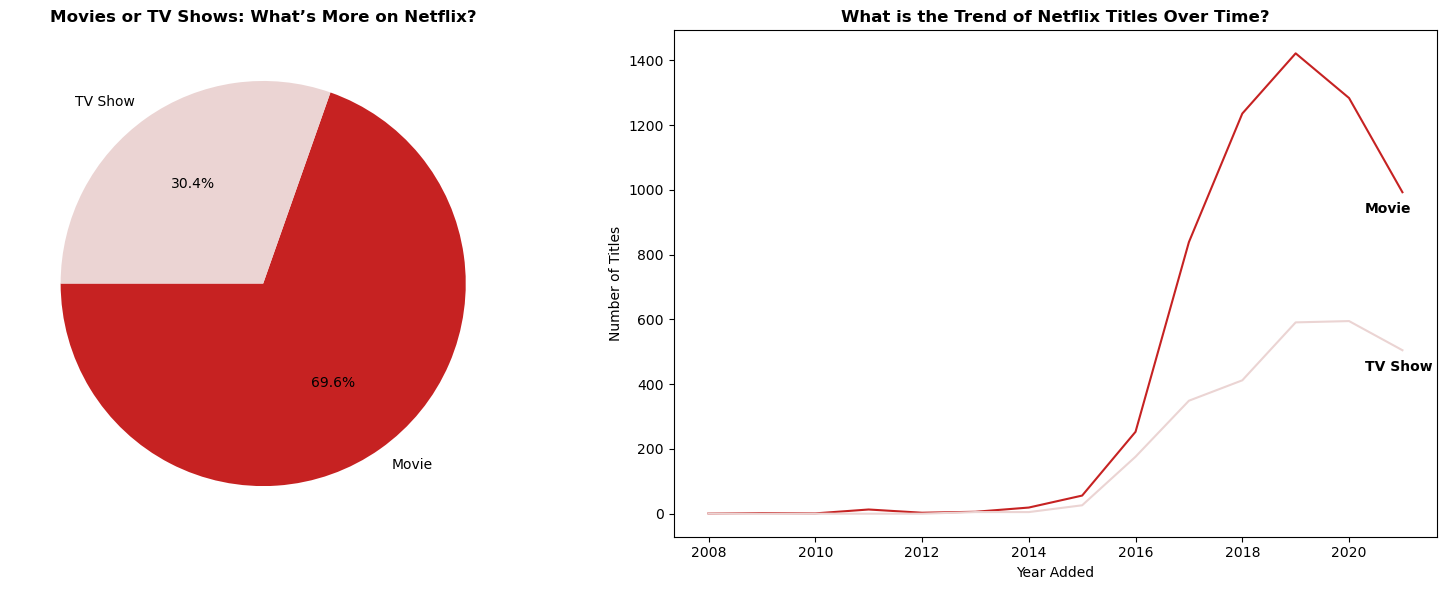

In [745]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=180, colors=netflix_palette)
axes[0].set_title('Movies or TV Shows: What’s More on Netflix?', fontsize=12, fontweight='bold')

for col in type_by_year.columns:
    axes[1].text(
        x=type_by_year.index[-1]-0.7,
        y=type_by_year[col].iloc[-1]-30,
        s=col,
        va='top', ha='left',
        fontsize=10, fontweight='bold')

type_by_year.plot(ax=axes[1],color=netflix_palette)
axes[1].set_title('What is the Trend of Netflix Titles Over Time?',fontsize=12,fontweight='bold')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('Number of Titles')
axes[1].legend().remove()

plt.tight_layout()
plt.show()

**Has Netflix been increasingly focusing on TV shows rather than movies in recent years?**

- **Overall (pie chart)**: Movies **(70%)** still dominate Netflix **(30%)**.
- **Trend over time (line chart)**: Both Movies and TV shows expanded rapidly after 2015, but Movies grew much faster, peaking around 2019. TV shows also rose, but they never overtook Movies.
- **Recent Year (line chart)**: After 2019, both categories declined, but movies displayed the sharpest drop.

#### **Category Analysis**: How the Category distribution on the platform (Top and Bottom)? Which Category is the most popular nowaday?

In [746]:
cat_counts = df_cat['category'].value_counts()
cat_counts

category
International Movies            2751
Dramas                          2424
Comedies                        1673
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               755
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        575
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows              

In [747]:
cat_by_year = df_cat.dropna(subset=['year_added']).groupby(['year_added', 'category']).size().unstack(fill_value=0)
cat_by_year

category,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
year_added,,,,,,,,,,,,,,,,,,,,,
2008.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2012.0,0,0,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2013.0,0,0,0,0,2,0,0,1,2,0,...,0,0,4,0,1,1,0,1,1,0
2014.0,1,0,0,0,4,1,0,2,1,0,...,0,3,3,0,0,0,0,1,0,0
2015.0,2,0,0,6,11,1,0,12,1,0,...,2,8,8,2,2,2,0,1,0,2
2016.0,18,4,14,19,20,1,2,48,27,1,...,8,40,43,5,4,3,2,5,3,14


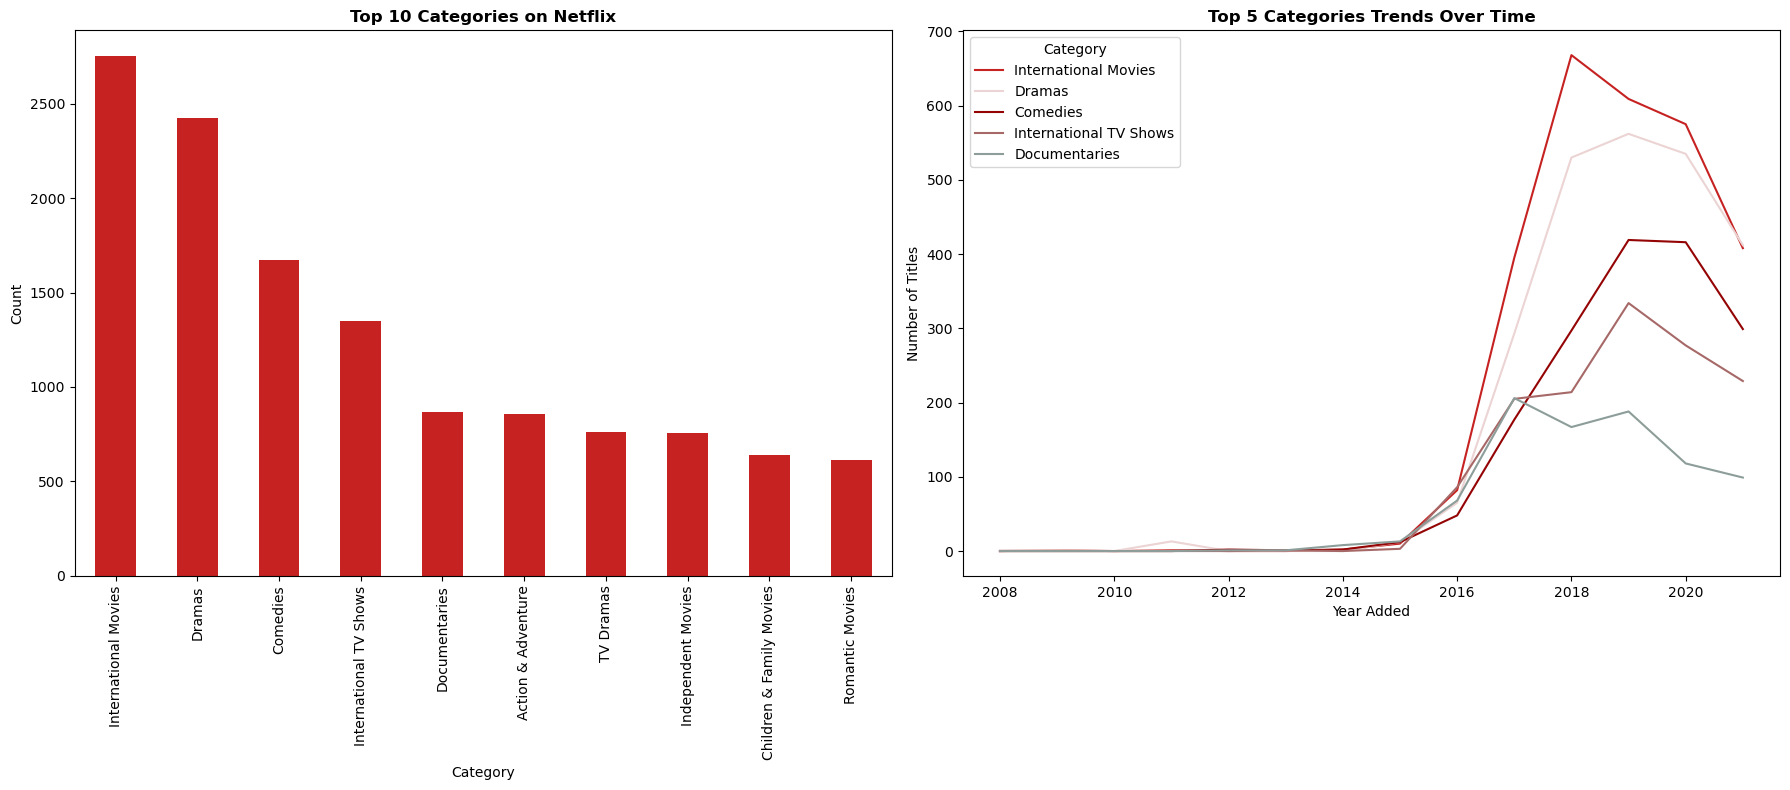

In [748]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

cat_counts.head(10).plot(kind='bar', ax=axes[0], color=netflix_palette[0])
axes[0].set_title('Top 10 Categories on Netflix',fontsize=12, fontweight = 'bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

top_cat = cat_counts.head(5).index
cat_by_year[top_cat].plot(ax=axes[1], color=netflix_palette[:5])
axes[1].set_title('Top 5 Categories Trends Over Time',fontsize=12, fontweight = 'bold')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('Number of Titles')
axes[1].legend(title='Category')

plt.tight_layout()
plt.show()

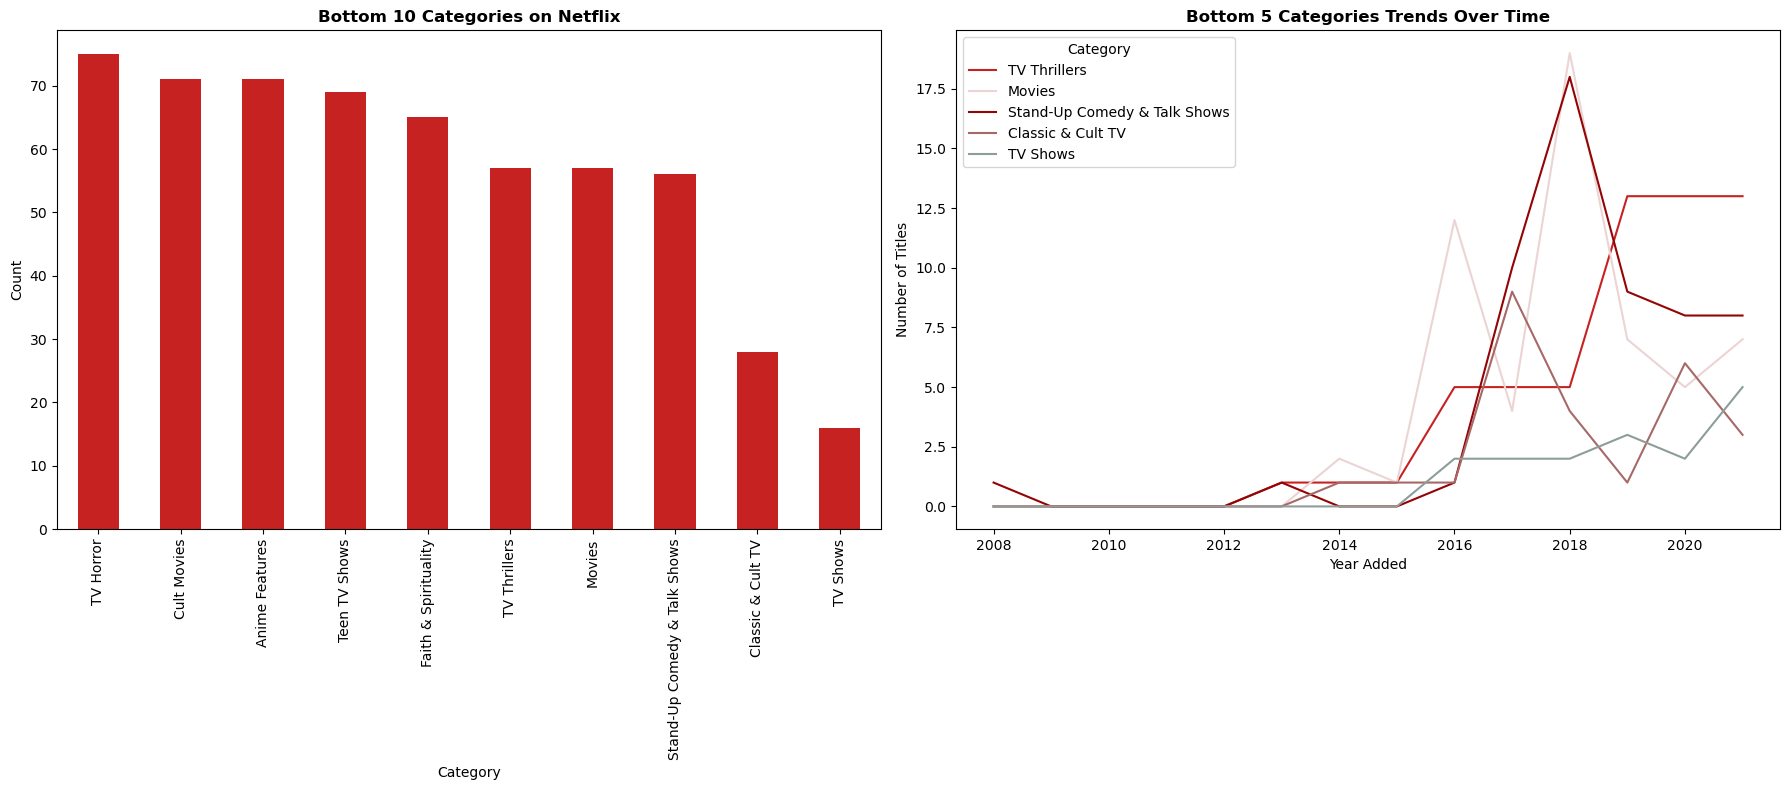

In [749]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

cat_counts.tail(10).plot(kind='bar', ax=axes[0], color=netflix_palette[0])
axes[0].set_title('Bottom 10 Categories on Netflix',fontsize=12, fontweight = 'bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

top_cat = cat_counts.tail(5).index
cat_by_year[top_cat].plot(ax=axes[1], color=netflix_palette[:5])
axes[1].set_title('Bottom 5 Categories Trends Over Time',fontsize=12, fontweight = 'bold')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('Number of Titles')
axes[1].legend(title='Category')

plt.tight_layout()
plt.show()

**How the Category distribution on the platform (Top and Bottom)? Which Category is the most popular nowaday?**

- **Overall (bar chart)**
    - Comedies rank in the top 3, while Stand-Up Comedy & Talk Shows are among the bottom 3. Similarly, although TV Shows overall are the least represented, International TV Shows rank in the top 4.
    - oth TV Dramas and Dramas are strong categories, but still rank behind International Movies.  
- **Trend over time (line chart)**:
    - International Movies peaked in 2018 with nearly 700 titles, but the market downturn after 2019. By 2021, the number of titles in International Movies and Dramas was nearly the same.
    - This downturn also affected all of the top 5 categories
    - In 2020, Classic & Cult TV was the bottom 3 categories, and by 2021 it became the least-published category.

#### **Category Analysis**: Which is more common between Single Category or Multi-Category?

In [750]:
df['cat_count'] = df['listed_in'].str.count(',') + 1
df['Category Type'] = df['cat_count'].apply(lambda x: 'Multi-Category' if x > 1 else 'Single Category')
cat_type_dist = df.groupby(['type', 'Category Type'], observed=True)['title'].count().reset_index()

In [751]:
cat_type_dist_ratio = cat_type_dist.pivot(index='type', columns='Category Type', values='title')
cat_type_dist_ratio['Ratio Single/Multi'] = ((cat_type_dist_ratio['Single Category']/cat_type_dist_ratio['Multi-Category'])*100).round(2)
cat_type_dist_ratio['Ratio Single/Total'] = ((cat_type_dist_ratio['Single Category']/(cat_type_dist_ratio['Single Category']+cat_type_dist_ratio['Multi-Category']))*100).round(2)
cat_type_dist_ratio['Ratio Multi/Total'] = ((cat_type_dist_ratio['Multi-Category']/(cat_type_dist_ratio['Single Category']+cat_type_dist_ratio['Multi-Category']))*100).round(2)
cat_type_dist_ratio

Category Type,Multi-Category,Single Category,Ratio Single/Multi,Ratio Single/Total,Ratio Multi/Total
type,,,,,
Movie,4647,1481,31.87,24.17,75.83
TV Show,2136,539,25.23,20.15,79.85


**Which is more common betwween Single Category or Multi-Category?**
- Multi-Category content clearly dominates Single Category.
- For Movies, Single Category accounts for about 1/4 of the total.
- For TV Shows, Single Category accounts for about 1/5 of the total.

#### **Rating Analysis**: Is there enough content for kids and adults? Where are the content gaps, and how can Netflix grow?

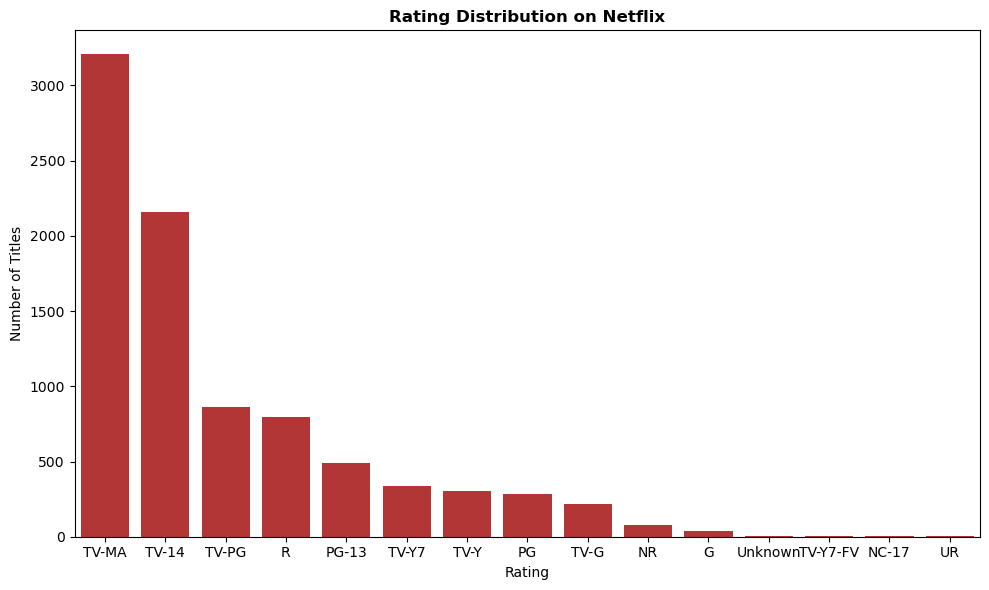

In [752]:
rating_dist = df['rating'].value_counts().reset_index()
rating_dist.columns = ['rating', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=rating_dist.head(15), x='rating', y='count', color=netflix_palette[0])
plt.title('Rating Distribution on Netflix', fontsize=12, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')

plt.tight_layout()
plt.show()

In [753]:
age_counts = df[df['rating_age_group']!='Unrated']['rating_age_group'].value_counts().reset_index()
age_counts.columns = ['rating_age_group', 'count']

In [754]:
age_counts['percent'] = (age_counts['count'] / age_counts['count'].sum() * 100).round(1)
age_counts['label'] = age_counts.apply(
    lambda row: f"{row['rating_age_group']}\n({int(row['count'])})\n{row['percent']}%", axis=1)

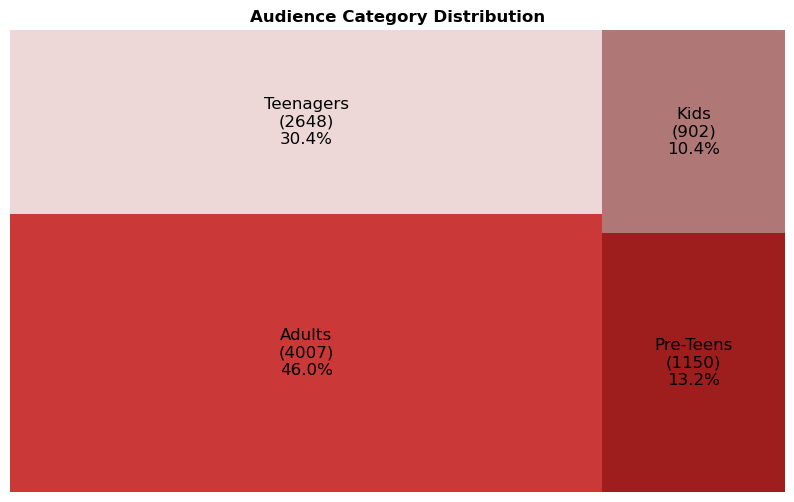

In [755]:
treemap_colors = netflix_palette[:len(age_counts)]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=age_counts['count'], label=age_counts['label'], color=treemap_colors, alpha=0.9, text_kwargs={'fontsize': 12, 'color': 'black'})
plt.axis('off')
plt.title('Audience Category Distribution', fontsize=12, fontweight ='bold')
plt.show()

**Is there enough content for kids and adults? Where are the content gaps, and how can Netflix grow?**

- **Line Chart**
Netflix’s category is dominated by mature content, with **TV-MA** (3,000+) and **TV-14** (2,200+) titles leading. Children's content ratings **(TV-Y, TV-Y7, PG, G)** is very low compared to mature's content.

- **Heatmap**
Netflix’s category is dominated by content for adults and teenagers, accounting for over 76% of all titles, while kids and pre-teens make up only about 23.6%, highlighting the limited content available for kids and pre-teens.

#### **Countries Analysis**: Which country is leading Netflix content production? What are the top 10 countries with the highest number of Netflix titles (TV shows and movies)?

In [756]:
df_country_exploded = df[df['country']!='Unknown'].copy()
df_country_exploded['country'] = df_country_exploded['country'].str.split(', ')
df_country_exploded = df_country_exploded.explode('country')

In [757]:
country_counts_exploded = df_country_exploded['country'].value_counts().reset_index()
country_counts_exploded.columns = ['Country', 'count']

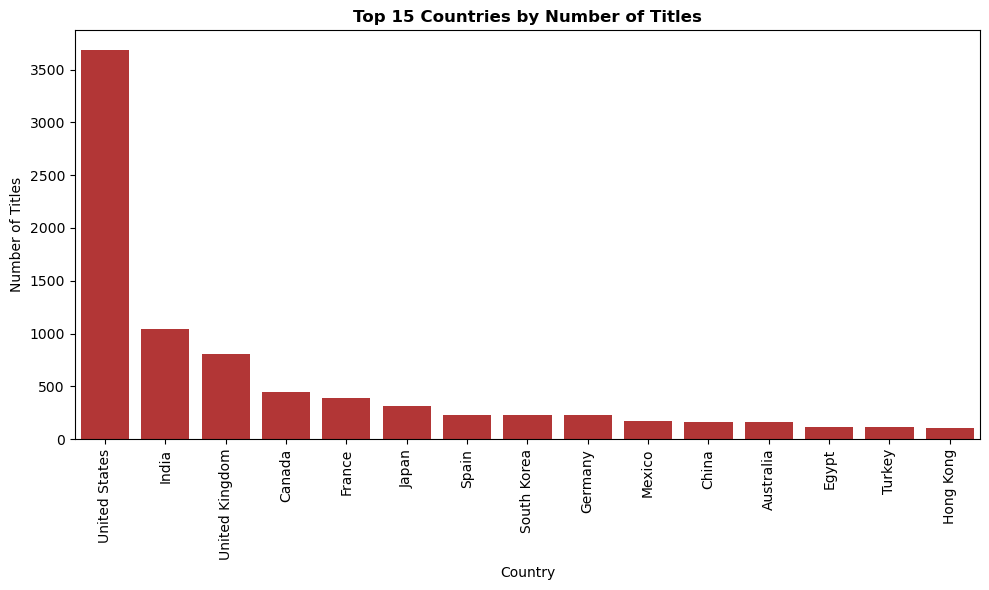

In [758]:
plt.figure(figsize=(10, 6))
sns.barplot(data=country_counts_exploded.head(15),x='Country',y='count',color=netflix_palette[0])
plt.title('Top 15 Countries by Number of Titles', fontsize=12, fontweight='bold')
plt.ylabel('Number of Titles')
plt.xlabel('Country')
plt.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [759]:
type_counts = df_country_exploded.groupby(['country', 'type'], observed=True)['title'].count().reset_index()
tv_top_10 = type_counts[type_counts['type'] == 'TV Show'].nlargest(10, 'title').reset_index(drop=True)
movie_top_10 = type_counts[type_counts['type'] == 'Movie'].nlargest(10, 'title').reset_index(drop=True)
display(movie_top_10,tv_top_10)

,country,type,title
0,United States,Movie,2750
1,India,Movie,961
2,United Kingdom,Movie,532
3,Canada,Movie,319
4,France,Movie,303
5,Germany,Movie,182
6,Spain,Movie,171
7,Japan,Movie,119
8,China,Movie,114
9,Mexico,Movie,111


,country,type,title
0,United States,TV Show,938
1,United Kingdom,TV Show,272
2,Japan,TV Show,199
3,South Korea,TV Show,170
4,Canada,TV Show,126
5,France,TV Show,90
6,India,TV Show,84
7,Taiwan,TV Show,70
8,Australia,TV Show,66
9,Spain,TV Show,61


**Which country is leading Netflix content production? What are the top 10 countries with the highest number of Netflix titles (TV shows and movies)?**

- **The United States becomes dominant, making up almost 50% of all top-10 Netflix content production**. India remains the second-highest contributor, followed by the United Kingdom, Canada, and France. This highlight most Netflix content comes from Western and South Asian regions, leaving room for competitors to grow in underrepresented markets like Japan, Spain, and South Korea
- **The United States leads in both TV shows and movies, but its dominance in movies (2,750) reflects Hollywood’s strong film industry**. Asian countries like **Japan and South Korea contribute more proportionally to TV shows**, highlighting the popularity of anime and K-dramas. This may suggests Western countries prioritize movie production, while **Asia is driving growth in serialized streaming content in last decade**.


#### **Director Analysis**: Who are the top 10 Directors?

In [760]:
directors = df[df['director'].notna() & (df['director'].str.strip().str.lower() != 'unknown')]

In [761]:
director_counts= directors['director'].value_counts().reset_index()
director_counts.columns = ['director', 'count']
director_counts

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
...,...,...
4523,Mu Chu,1
4524,Chandra Prakash Dwivedi,1
4525,Majid Al Ansari,1
4526,Peter Hewitt,1


In [762]:
director_country = directors [directors['country'].notna() & (directors['country'].str.strip().str.lower() != 'unknown')].drop_duplicates(subset=['director'])[['director', 'country']]
director_country 

,director,country
0,Kirsten Johnson,United States
7,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin..."
8,Andy Devonshire,United Kingdom
9,Theodore Melfi,United States
12,Christian Schwochow,"Germany, Czech Republic"
...,...,...
8794,Mohamed Diab,"Egypt, France"
8798,Chandra Prakash Dwivedi,India
8801,Majid Al Ansari,"United Arab Emirates, Jordan"
8805,Peter Hewitt,United States


In [763]:
directors_country = pd.merge(director_counts, director_country, on='director', how='left').head(10)
directors_country 

,director,count,country
0,Rajiv Chilaka,19,India
1,"Raúl Campos, Jan Suter",18,Mexico
2,Suhas Kadav,16,India
3,Marcus Raboy,16,United States
4,Jay Karas,14,United States
5,Cathy Garcia-Molina,13,Philippines
6,Martin Scorsese,12,United States
7,Youssef Chahine,12,Egypt
8,Jay Chapman,12,United States
9,Steven Spielberg,11,United States


**Who are the top 10 Directors?**

**Rajiv Chilaka from India directed the most titles (19)**, followed by Raúl Campos and Jan Suter from Mexico (18). **The United States has the most directors in the top 10**, with five entries including Martin Scorsese and Steven Spielberg. Directors from India, Mexico, the Philippines, and Egypt also appear.

#### **Actor Analysis**: Who are the top 10 Actors?

In [764]:
df_actor_exploded = df[df['cast'].notna() & (df['cast'].str.strip().str.lower() != 'unknown')].copy()
df_actor_exploded['actor'] = df_actor_exploded['cast'].str.split(', ')
df_actor_exploded = df_actor_exploded.explode('actor')
df_actor_exploded['actor'] = df_actor_exploded['actor'].str.strip()
df_actor_exploded = df_actor_exploded[df_actor_exploded['actor'].str.lower() != 'unknown']

In [765]:
actor_counts= df_actor_exploded['actor'].value_counts().reset_index()
actor_counts.columns = ['actor', 'count']

In [766]:
actor_country = df_actor_exploded[df_actor_exploded['country'].notna() &(df_actor_exploded['country'].str.strip().str.lower() != 'unknown')].drop_duplicates(subset=['actor'])[['actor', 'country']]

In [767]:
top_actor_country = pd.merge(actor_counts, actor_country, on='actor', how='left').head(10)
top_actor_country

,actor,count,country
0,Anupam Kher,43,India
1,Shah Rukh Khan,35,India
2,Julie Tejwani,33,India
3,Takahiro Sakurai,32,Japan
4,Naseeruddin Shah,32,India
5,Rupa Bhimani,31,India
6,Om Puri,30,India
7,Akshay Kumar,30,India
8,Yuki Kaji,29,Japan
9,Paresh Rawal,28,India


**Who are the top 10 Actors?**

Suprisingly, Although the United States leads total production, **there is no United States actor in top 10**. **Actor Anupam Kher appears in the most titles (43)**, followed by Shah Rukh Khan (35) and Julie Tejwani (33), all from India. **8 out of the top 10 most frequent cast members are from India**. Only 2 actors, Takahiro Sakurai and Yuki Kaji, represent Japan in the top 10.

#### **Duration Analysis**: How do Movies and TV Shows compare their duration trends?

In [768]:
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

movies['duration_minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)
tv_shows['duration_seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

movie_duration_by_year = movies.dropna(subset=['year_added']).groupby('year_added')['duration_minutes'].mean()
tv_duration_by_year = tv_shows.dropna(subset=['year_added']).groupby('year_added')['duration_seasons'].mean()

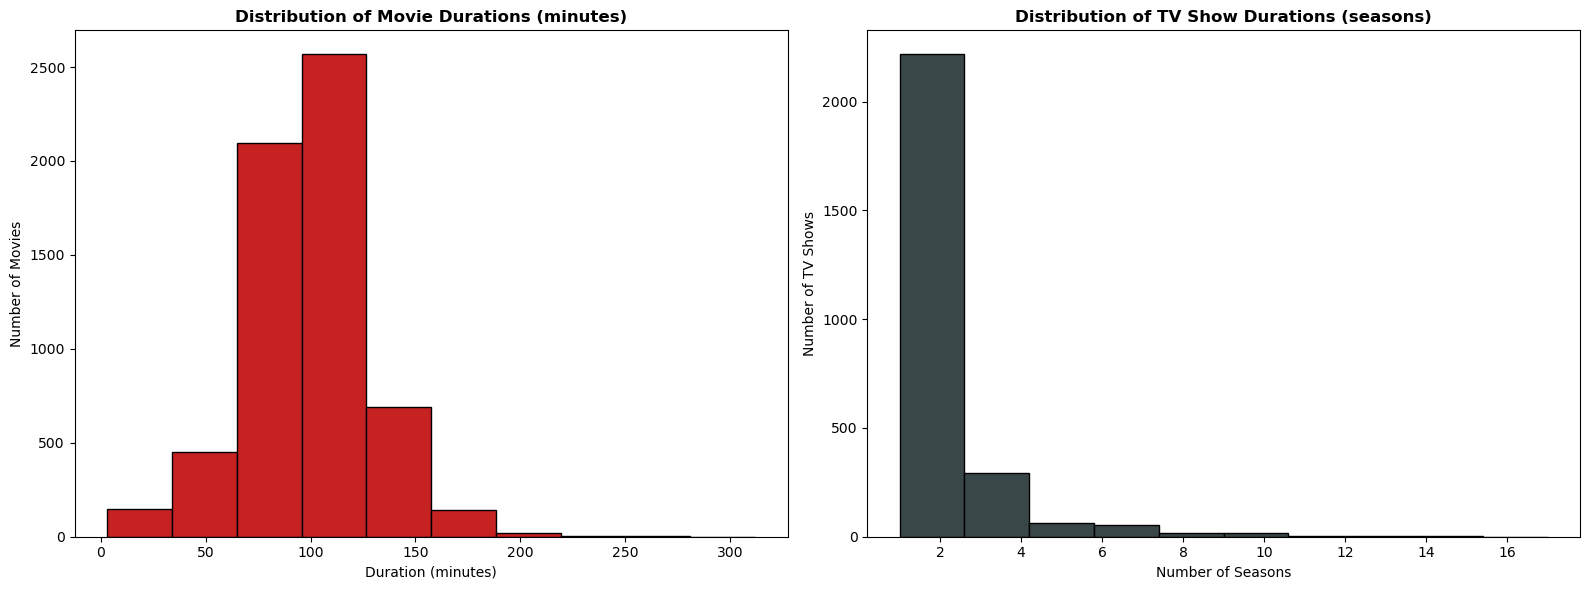

In [769]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].hist(movies['duration_minutes'].dropna(), color=netflix_palette[0], edgecolor='black')
axes[0].set_title('Distribution of Movie Durations (minutes)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Number of Movies')

axes[1].hist(tv_shows['duration_seasons'].dropna(), color=netflix_palette[5], edgecolor='black')
axes[1].set_title('Distribution of TV Show Durations (seasons)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Seasons')
axes[1].set_ylabel('Number of TV Shows')

plt.tight_layout()
plt.show()

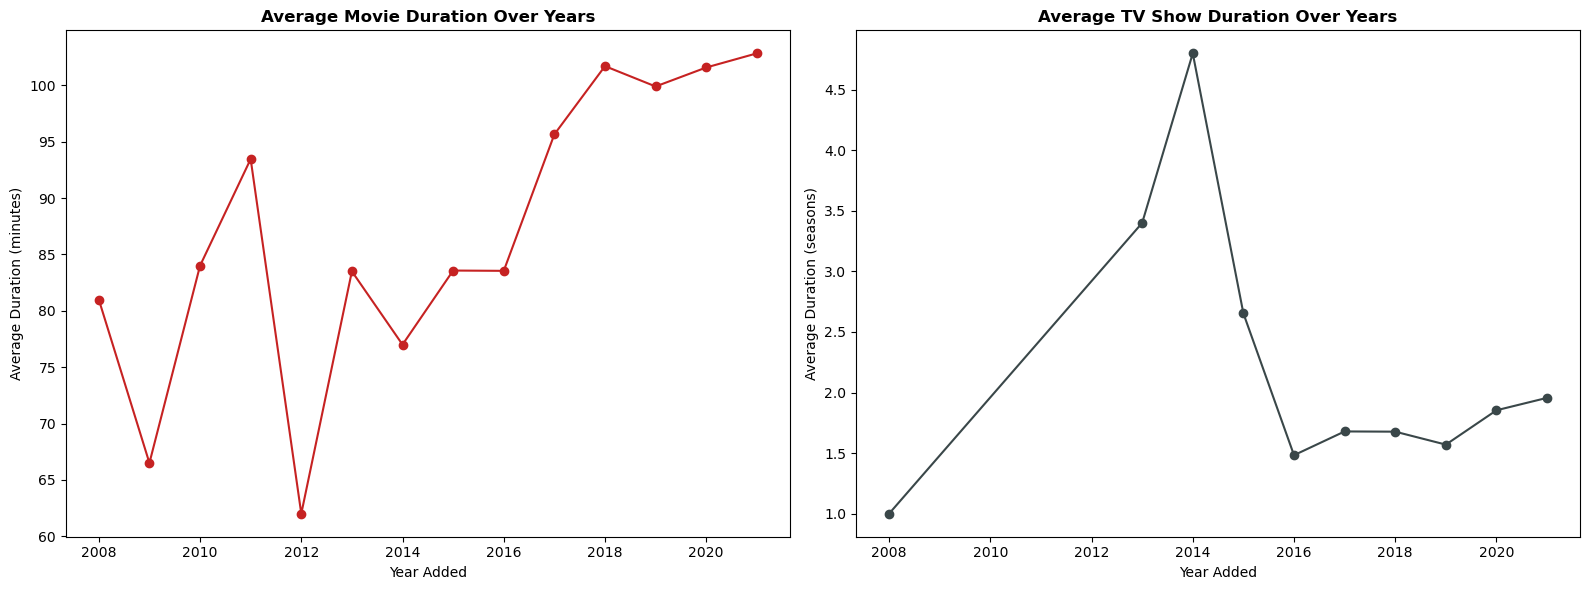

In [770]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Movies: Average duration in minutes over years
axes[0].plot(movie_duration_by_year.index, movie_duration_by_year.values, marker='o', color=netflix_palette[0])
axes[0].set_title('Average Movie Duration Over Years', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year Added')
axes[0].set_ylabel('Average Duration (minutes)')

# TV Shows: Average number of seasons over years
axes[1].plot(tv_duration_by_year.index, tv_duration_by_year.values, marker='o', color=netflix_palette[5])
axes[1].set_title('Average TV Show Duration Over Years', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('Average Duration (seasons)')

plt.tight_layout()
plt.show()

**How do Movies and TV Shows compare their duration trends?**
- **Movies are the most common content type, usually 90–110 minutes long**, while **most TV shows have just 1 season**, showing that limited series dominate.
- Since 2016, movie lengths have steadily grown, suggesting **Netflix is focusing on longer, more cinematic productions**.
- In 2014, average TV show seasons dropped, likely due to a shift toward miniseries or short-format releases.

#### **Time Series Analysis**: How Has Netflix Content Release Volume Changed Over Time?

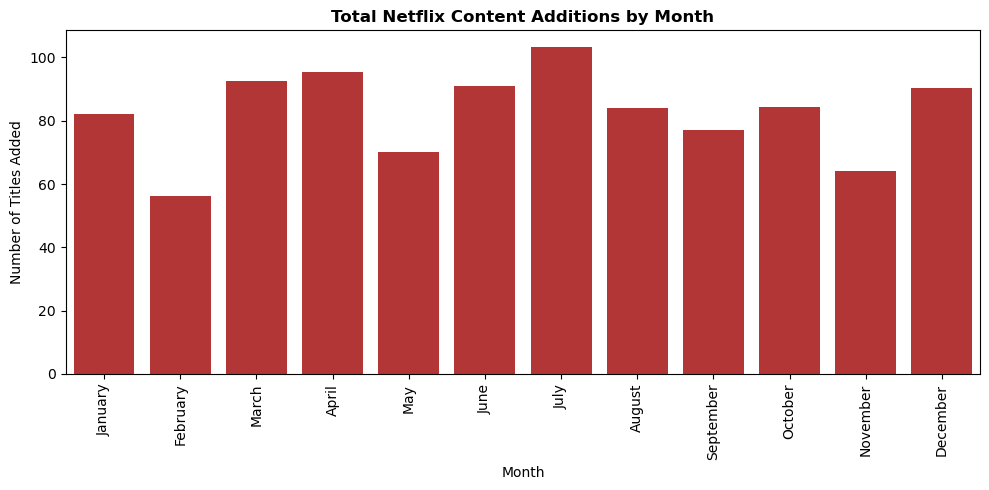

In [771]:
monthly_totals = monthly_pivot.mean(axis=1).reindex(month_order)
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_totals.index, y=monthly_totals.values, color=netflix_palette[0])
plt.title('Total Netflix Content Additions by Month', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [772]:
monthly_adds = df.groupby(['month_added', 'year_added']).size().reset_index(name='count')
monthly_pivot = monthly_adds.pivot(index='month_added', columns='year_added', values='count').reindex(month_order)
monthly_pivot.columns = monthly_pivot.columns.astype(int)

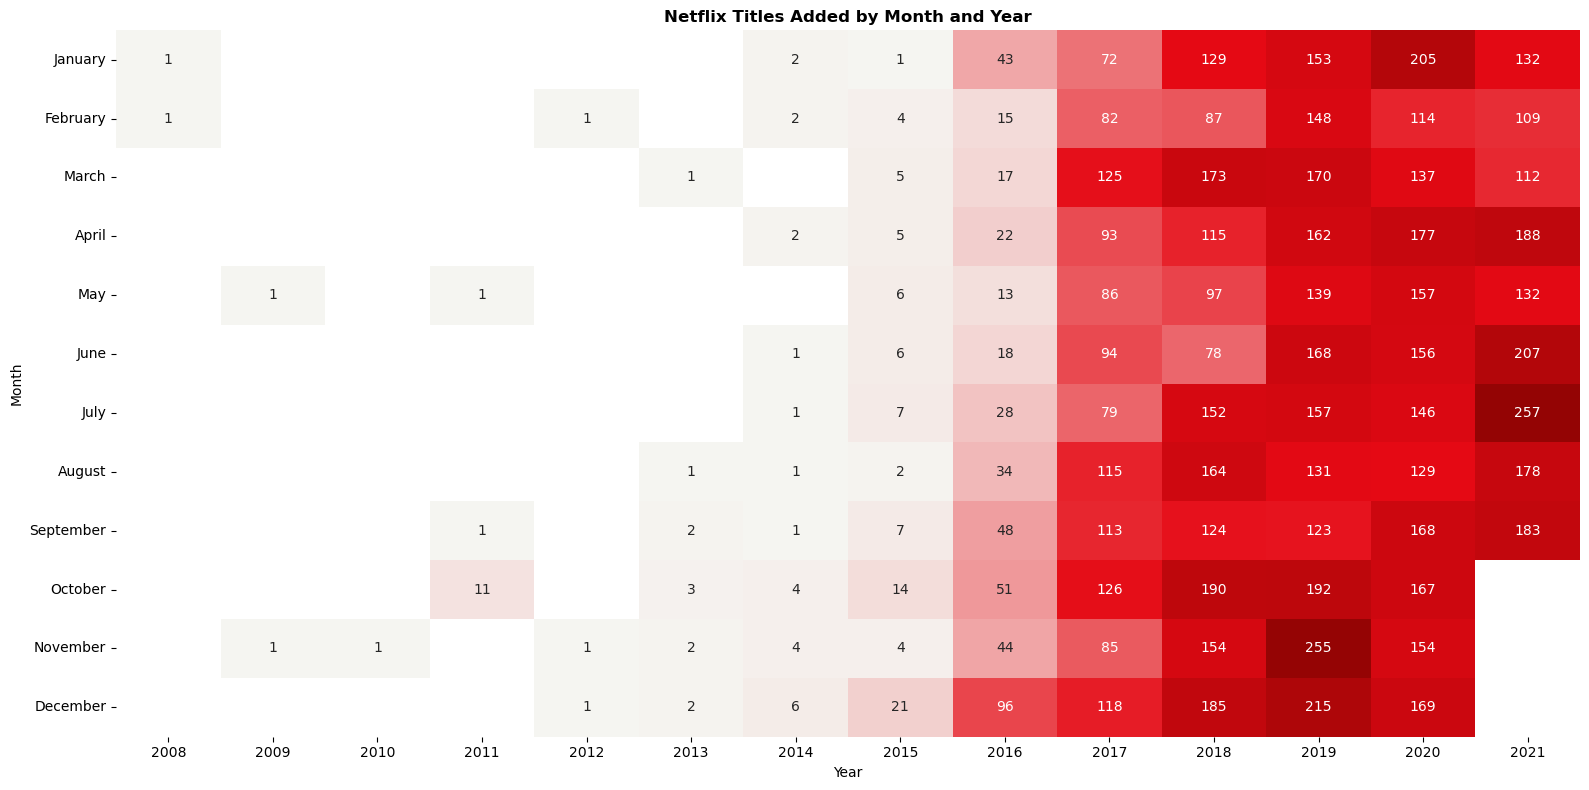

In [773]:
plt.figure(figsize=(16, 8))
sns.heatmap(monthly_pivot,cmap=netflix_cmap,annot=True,fmt='.0f',linewidths=0,linecolor='white',cbar=False)
plt.title('Netflix Titles Added by Month and Year', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Month')

plt.tight_layout()
plt.show()

**When does Netflix release the most content? Are there seasonal or yearly patterns?**

- **Bar Chart:**
**Netflix releases content consistently across the year**, but **July has highest number of titles added**. On the orther hand, **February and November see noticeably fewer releases**.

- **Heatmap:**
**Content production grew rapidly from 2015 to 2019**, with the largest numbers in late 2018 and 2019. However, **after 2019, the number of new titles started to decline**. July 2020 shows the single highest monthly addition (257 titles).